In [128]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
sns.set()

sns.set_style('darkgrid')

In [129]:
df = pd.read_excel('train.xlsx')

In [86]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [87]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional Info    object
Price               int64
dtype: object

In [88]:
df.shape

(10683, 11)

In [89]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [90]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [91]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [92]:
df['Additional Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [93]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [94]:
df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [95]:

# Remove 'h' and 'm' characters
df['Duration'] = df['Duration'].str.replace('h|m', '')

# Extract hour and minute values
df[['Duration_hours', 'Duration_minutes']] = df['Duration'].str.split(' ', expand=True)

# Fill NaN values with 0 in Duration_minutes column
df['Duration_minutes'] = df['Duration_minutes'].fillna(0)

# Print the modified DataFrame
print(df.head())


C:\Users\USER\AppData\Local\Temp\ipykernel_1160\2914062515.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Duration'] = df['Duration'].str.replace('h|m', '')


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional Info  Price  \
0    22:20  01:10 22 Mar     2 50    non-stop         No info   3898   
1    05:50         13:15     7 25     2 stops         No info   7663   
2    09:25  04:25 10 Jun       19     2 stops         No info  13883   
3    18:05         23:30     5 25      1 stop         No info   6219   
4    16:50         21:35     4 45      1 stop         No info  13303   

  Duration_hours Duration_minutes  
0              2               50  
1              7    

In [96]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2 50,non-stop,No info,3898,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7 25,2 stops,No info,7663,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13883,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,1 stop,No info,6219,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,1 stop,No info,13303,4,45


In [97]:
df.dropna(inplace=True)

In [98]:
df.shape

(10682, 13)

In [99]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2 50,non-stop,No info,3898,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7 25,2 stops,No info,7663,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13883,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,1 stop,No info,6219,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,1 stop,No info,13303,4,45


In [100]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify in

In [101]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional Info             object
Price                        int64
Duration_hours              object
Duration_minutes            object
dtype: object

In [102]:
df['Month'] = df['Date_of_Journey'].dt.month

In [103]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Duration_hours,Duration_minutes,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2 50,non-stop,No info,3898,2,50,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7 25,2 stops,No info,7663,7,25,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13883,19,0,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,1 stop,No info,6219,5,25,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,1 stop,No info,13303,4,45,1


In [104]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional Info','Route'],axis=1)

In [105]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_minutes,Month
0,IndiGo,Banglore,New Delhi,non-stop,3898,2,50,3
1,Air India,Kolkata,Banglore,2 stops,7663,7,25,1
2,Jet Airways,Delhi,Cochin,2 stops,13883,19,0,9
3,IndiGo,Kolkata,Banglore,1 stop,6219,5,25,12
4,IndiGo,Banglore,New Delhi,1 stop,13303,4,45,1


In [106]:
df.duplicated().sum()

3135

In [107]:
df = df.drop_duplicates()

In [108]:
df.shape

(7547, 8)

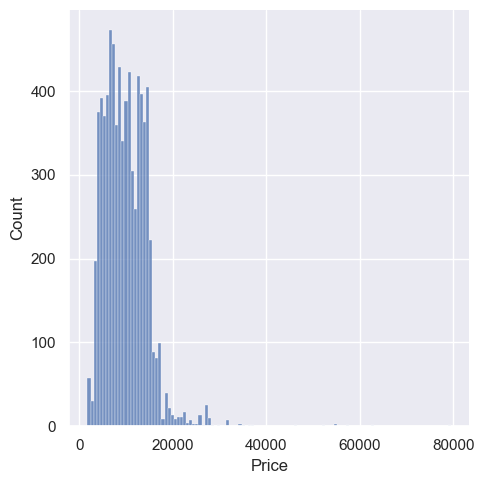

In [109]:
sns.displot(df['Price'])

In [110]:
def drop_outliers(data,var):
    q1,q3 = np.percentile(data[var],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5* iqr
    upper = q3 + 1.5* iqr
    data = data[data[var] < upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace= True)
    return data


In [111]:
df = drop_outliers(df,'Price')

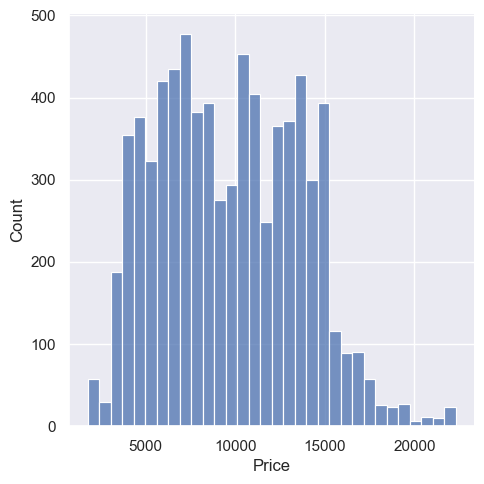

In [112]:
sns.displot(df['Price'])

In [113]:
X = df.drop(['Price'],axis=1)
y= df['Price']

In [114]:
X.head()

,Airline,Source,Destination,Total_Stops,Duration_hours,Duration_minutes,Month
0,IndiGo,Banglore,New Delhi,non-stop,2,50,3
1,Air India,Kolkata,Banglore,2 stops,7,25,1
2,Jet Airways,Delhi,Cochin,2 stops,19,0,9
3,IndiGo,Kolkata,Banglore,1 stop,5,25,12
4,IndiGo,Banglore,New Delhi,1 stop,4,45,1


In [115]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the encoder
encoder = OrdinalEncoder()

# select the columns to encode
columns_to_encode = ['Airline', 'Source', 'Destination', 'Total_Stops']

# fit the encoder to the selected columns
encoder.fit(X[columns_to_encode])

# transform the selected columns
X[columns_to_encode] = encoder.transform(X[columns_to_encode])

# print the encoded data
X.head()


,Airline,Source,Destination,Total_Stops,Duration_hours,Duration_minutes,Month
0,3.0,0.0,5.0,4.0,2,50,3
1,1.0,3.0,0.0,1.0,7,25,1
2,4.0,2.0,1.0,1.0,19,0,9
3,3.0,3.0,0.0,0.0,5,25,12
4,3.0,0.0,5.0,0.0,4,45,1


In [117]:
col2 = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col2)

In [118]:
X.head()

,Airline,Source,Destination,Total_Stops,Duration_hours,Duration_minutes,Month
0,0.3,0.00,1.0,1.00,0.021739,0.909091,0.181818
1,0.1,0.75,0.0,0.25,0.130435,0.454545,0.000000
2,0.4,0.50,0.2,0.25,0.391304,0.000000,0.727273
3,0.3,0.75,0.0,0.00,0.086957,0.454545,1.000000
4,0.3,0.00,1.0,0.00,0.065217,0.818182,0.000000


In [119]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [121]:
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()

Train r2 score:  0.8187591577644544
Test r2 score:  0.5486482530654747
train_mse1:  2824528.6375319753
test_mse1:  6997986.788339488


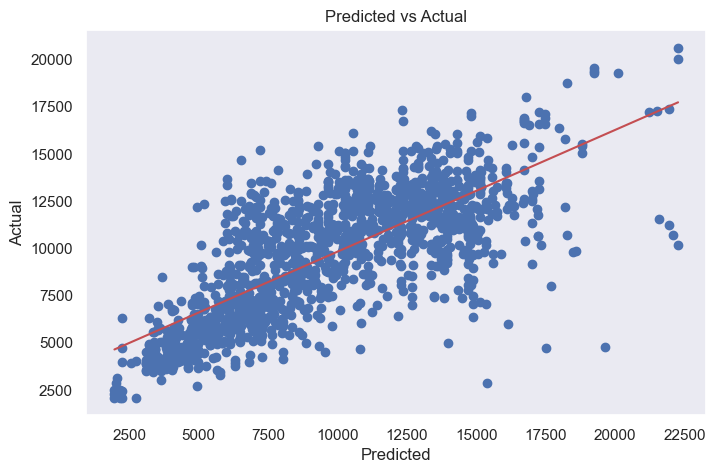

In [122]:
model1 = model_to_use('RF')

model1.fit(X_train,y_train)
evaluate(model1)

Train r2 score:  0.7756215182828284
Test r2 score:  0.6132300668960782
train_mse1:  3496802.593934314
test_mse1:  5996677.5366903


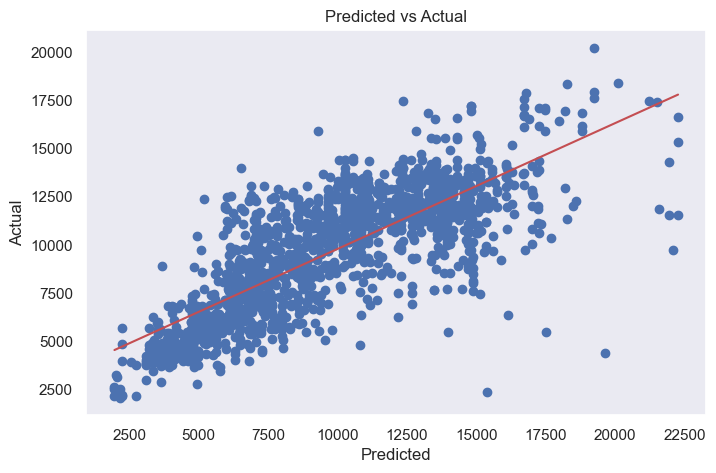

In [123]:
model2 = model_to_use('XGBC')

model2.fit(X_train,y_train)
evaluate(model2)

Train r2 score:  0.7010835954069812
Test r2 score:  0.6292784471776754
train_mse1:  4658430.928630331
test_mse1:  5747855.295616406


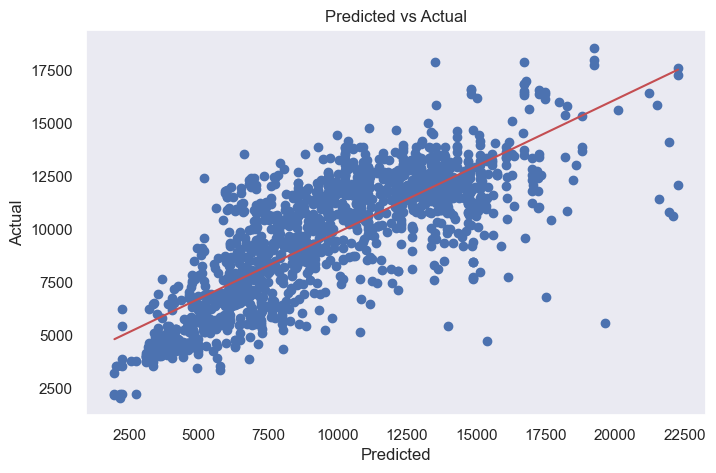

In [136]:
model3 = model_to_use('LGBMC')

model3.fit(X_train,y_train)
evaluate(model3)

In [132]:
'''from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge regression model
model = Ridge()

# Define the hyperparameters to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
'''

{'alpha': 1}


In [133]:
'''from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create an XGBoost model
model = XGBRegressor()

# Define the hyperparameters to search over
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 500, 1000],
              'gamma': [0, 0.1, 0.5]}

# Perform a random search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)
'''

{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5}


In [134]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameters to search over
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10]}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
'''

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 1000}


Train r2 score:  0.7386489701764496
Test r2 score:  0.6323261126911235
train_mse1:  4072997.3392295036
test_mse1:  5700602.741165826


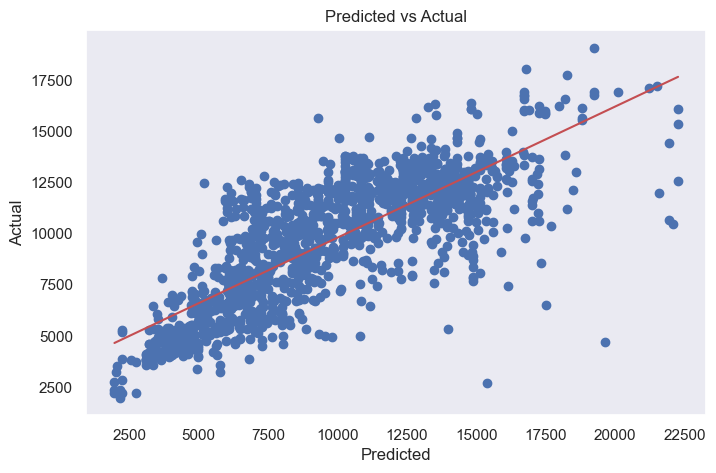

In [137]:
from xgboost import XGBRegressor

# Create an XGBoost model with the specified hyperparameters
model5 = XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, gamma=0.5)
model5.fit(X_train,y_train)
evaluate(model5)

Train r2 score:  0.6499853189129272
Test r2 score:  0.6149757935189314
train_mse1:  5454766.586232324
test_mse1:  5969610.904234014


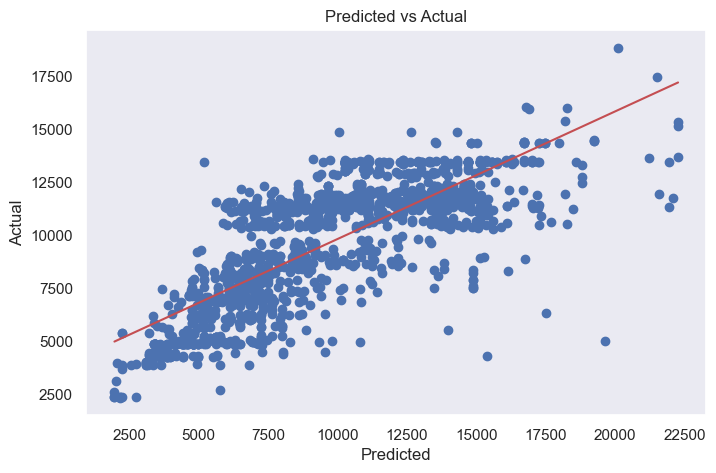

In [138]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with the specified hyperparameters
model6 = RandomForestRegressor(max_depth=7, min_samples_split=2, n_estimators=1000)
model6.fit(X_train,y_train)
evaluate(model6)

In [125]:
import pickle
from pickle import dump
#save the model
dump(model2, open('model.pkl','wb'))

#save scaler
dump(scaler, open ('scal.pkl', "wb"))

#save the encoder
dump(encoder, open ('enc.pkl', "wb"))

In [126]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Duration_hours',
       'Duration_minutes', 'Month'],
      dtype='object')

In [127]:
df.Duration_hours.unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)